In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset. Replace 'titanic.csv' with your own dataset file for your project.
# Ensure the dataset file exists and is in the same directory as this jupyter notebook.
df = pd.read_csv('Animal_Dataset.csv')

# Display the first few rows of the dataframe to ensure it is loaded correctly
df.head()
df.info()
df.describe()
df.isna().sum()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Animal                   205 non-null    object
 1   Height (cm)              205 non-null    object
 2   Weight (kg)              205 non-null    object
 3   Color                    205 non-null    object
 4   Lifespan (years)         205 non-null    object
 5   Diet                     205 non-null    object
 6   Habitat                  205 non-null    object
 7   Predators                205 non-null    object
 8   Average Speed (km/h)     205 non-null    object
 9   Countries Found          205 non-null    object
 10  Conservation Status      205 non-null    object
 11  Family                   205 non-null    object
 12  Gestation Period (days)  205 non-null    object
 13  Top Speed (km/h)         205 non-null    object
 14  Social Structure         205 non-null    o

Animal                     0
Height (cm)                0
Weight (kg)                0
Color                      0
Lifespan (years)           0
Diet                       0
Habitat                    0
Predators                  0
Average Speed (km/h)       0
Countries Found            0
Conservation Status        0
Family                     0
Gestation Period (days)    0
Top Speed (km/h)           0
Social Structure           0
Offspring per Birth        0
dtype: int64

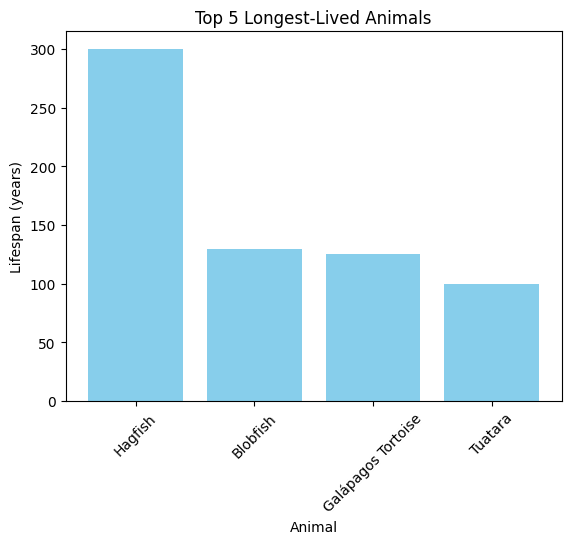

In [34]:
top5 = df.nlargest(5, "Lifespan_num")

plt.bar(top5["Animal"], top5["Lifespan_num"], color="skyblue")
plt.xlabel("Animal")
plt.ylabel("Lifespan (years)")
plt.title("Top 5 Longest-Lived Animals")
plt.xticks(rotation=45)
plt.show()

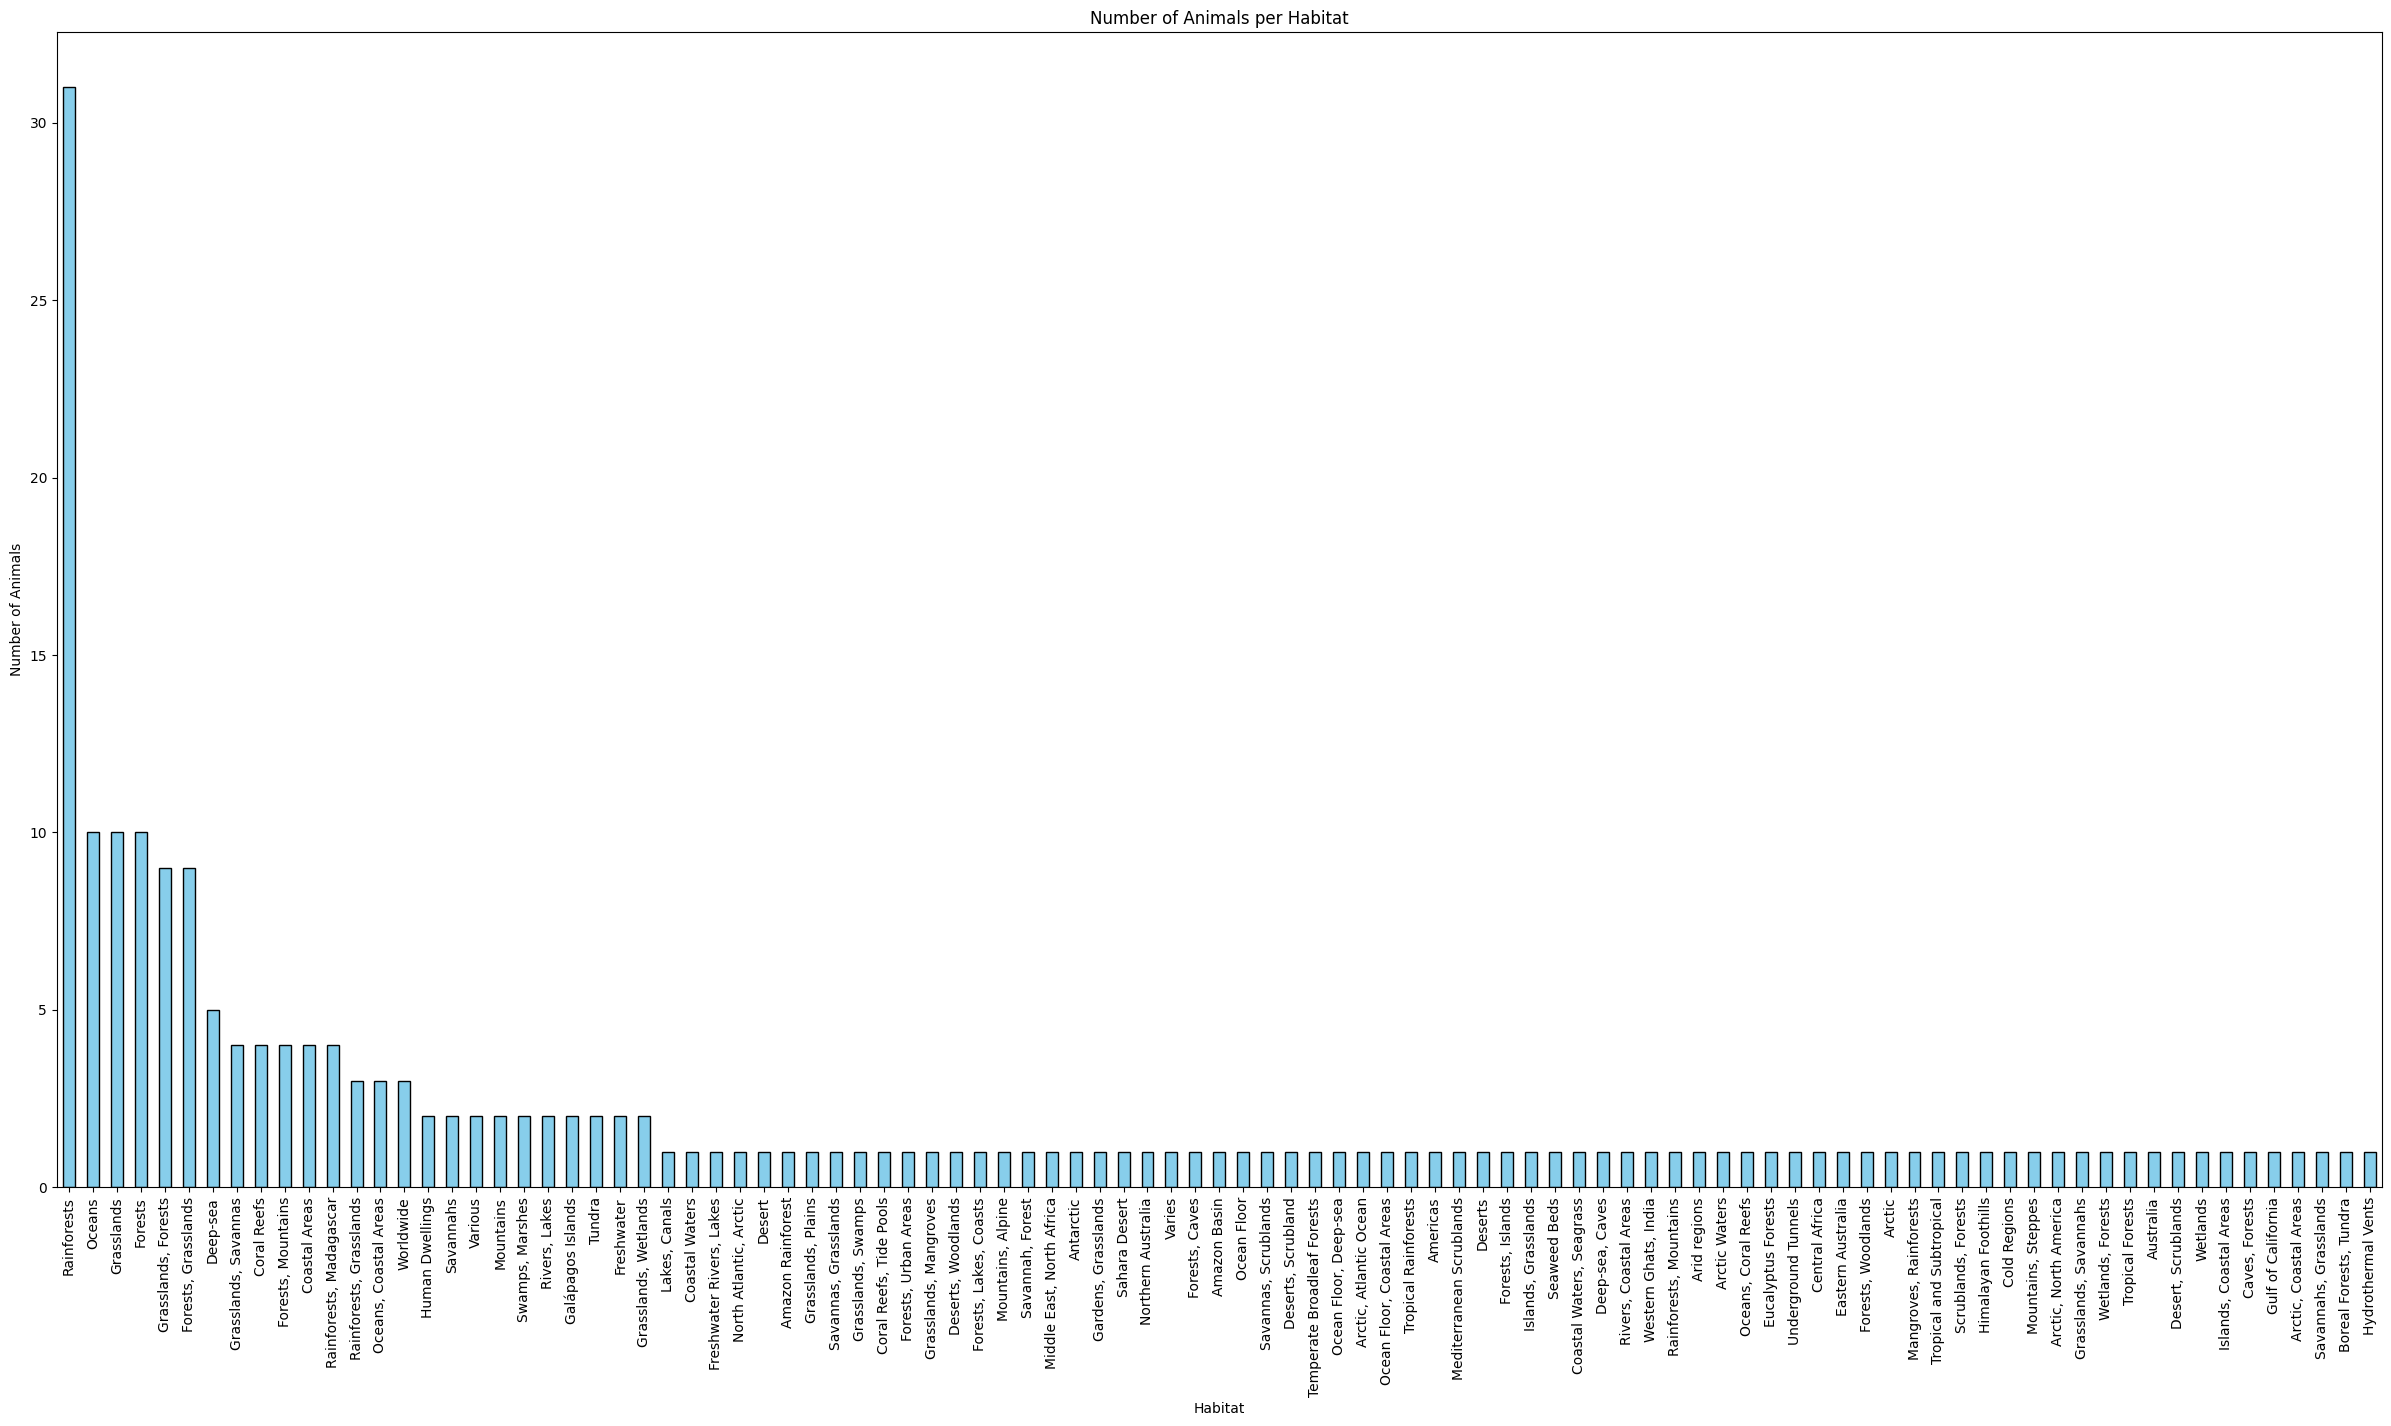

In [ ]:
habitat_counts = df["Habitat"].value_counts()


plt.figure(figsize=(30, 15))
habitat_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Number of Animals per Habitat")
plt.xlabel("Habitat")
plt.ylabel("Number of Animals")
plt.xticks(rotation=90) 
plt.show()

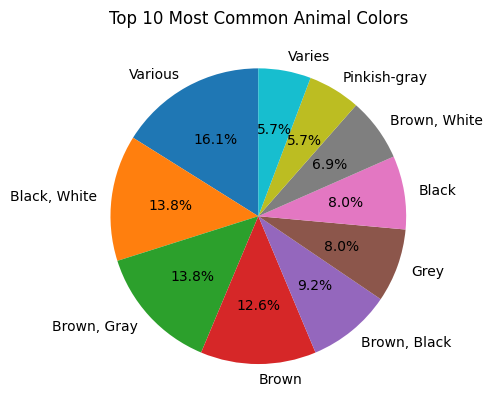

In [ ]:
import matplotlib.pyplot as plt


top_colors = df["Color"].value_counts().head(10)

plt.pie(top_colors, labels=top_colors.index, autopct="%1.1f%%", startangle=90)
plt.title("Top 10 Most Common Animal Colors")
plt.show()


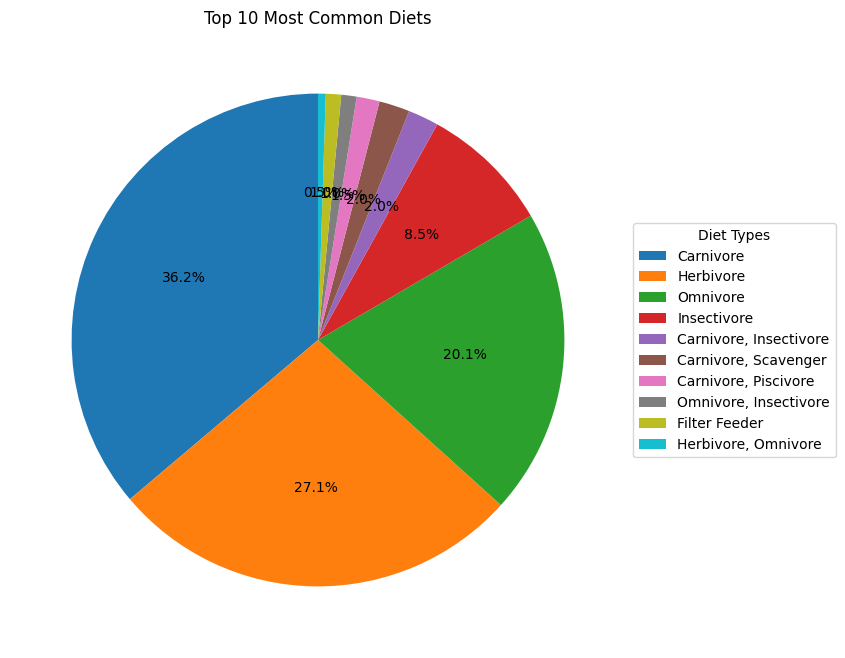

In [ ]:
import matplotlib.pyplot as plt

top_diets = df["Diet"].value_counts().head(10)

plt.figure(figsize=(8,8))
plt.pie(top_diets, autopct="%1.1f%%", startangle=90)
plt.title("Top 10 Most Common Diets")

plt.legend(top_diets.index, title="Diet Types", bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()


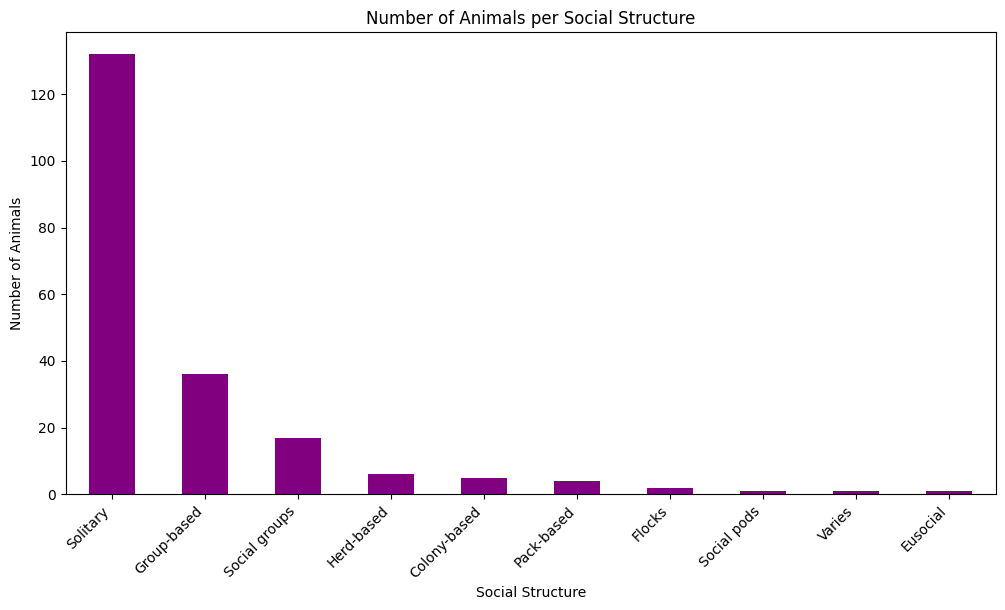

In [ ]:
import matplotlib.pyplot as plt

social_counts = df["Social Structure"].value_counts()

plt.figure(figsize=(12,6))
social_counts.plot(kind="bar", color="purple")
plt.xlabel("Social Structure")
plt.ylabel("Number of Animals")
plt.title("Number of Animals per Social Structure")
plt.xticks(rotation=45, ha="right")
plt.show()


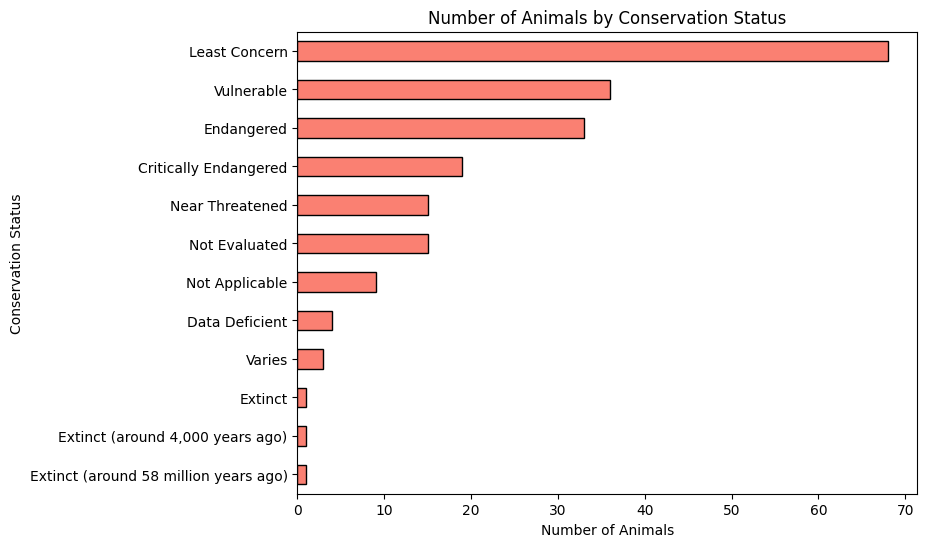

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

status_counts = df["Conservation Status"].value_counts().sort_values(ascending=True)
plt.figure(figsize=(8, 6))
status_counts.plot(kind="barh", color="salmon", edgecolor="black")
plt.title("Number of Animals by Conservation Status")
plt.xlabel("Number of Animals")
plt.ylabel("Conservation Status")
plt.show()


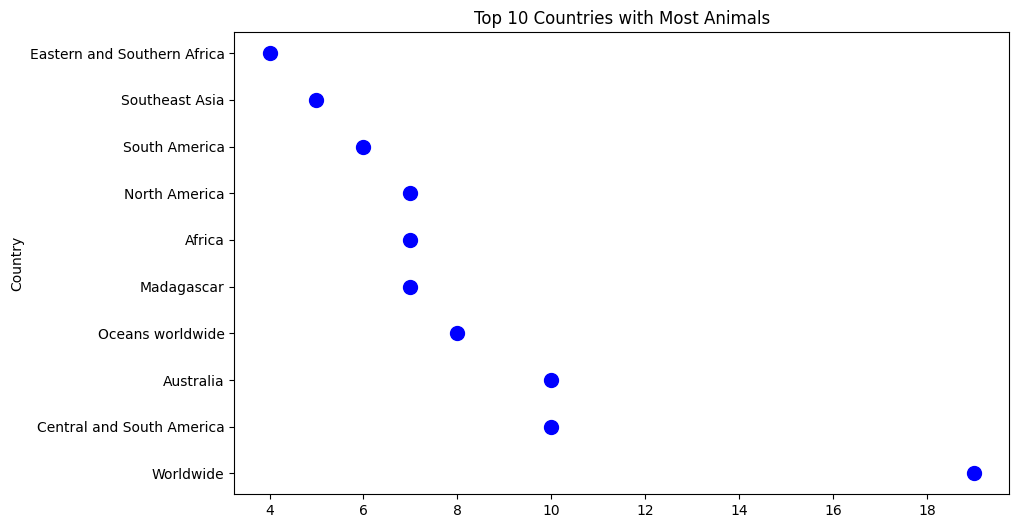

In [49]:
import matplotlib.pyplot as plt

country_counts = df["Countries Found"].value_counts().head(10) 

plt.figure(figsize=(10,6))
plt.scatter(country_counts.values, country_counts.index, color="blue", s=100)  
plt.ylabel("Country")
plt.title("Top 10 Countries with Most Animals")
plt.show()


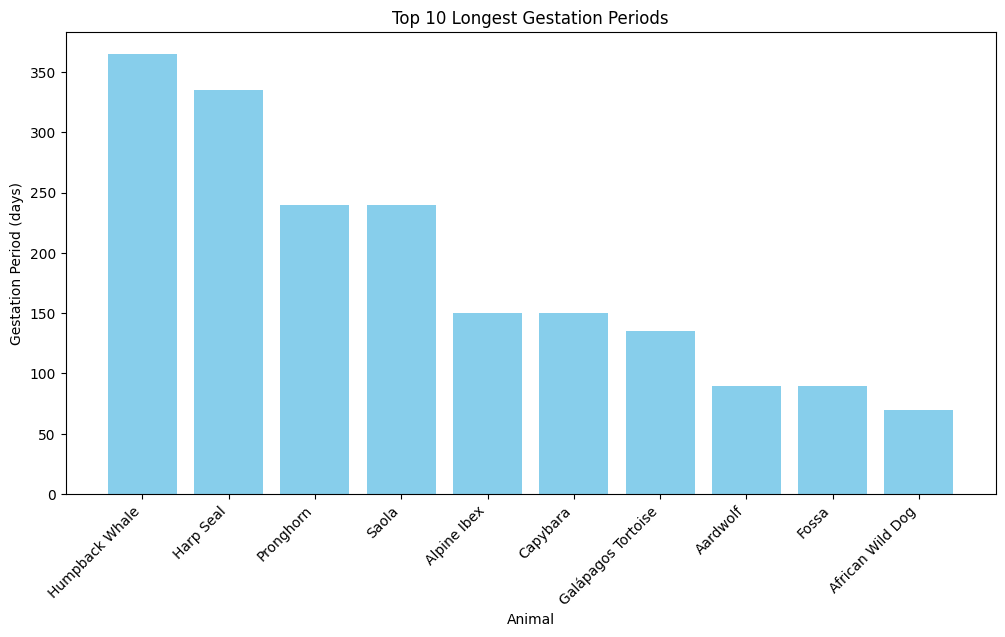

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df["Gestation_num"] = pd.to_numeric(df["Gestation Period (days)"], errors="coerce")

df_clean = df.dropna(subset=["Gestation_num"])

top_gestation = df_clean.nlargest(10, "Gestation_num")

# Plot
plt.figure(figsize=(12,6))
plt.bar(top_gestation["Animal"], top_gestation["Gestation_num"], color="skyblue")
plt.xlabel("Animal")
plt.ylabel("Gestation Period (days)")
plt.title("Top 10 Longest Gestation Periods")
plt.xticks(rotation=45, ha="right")
plt.show()


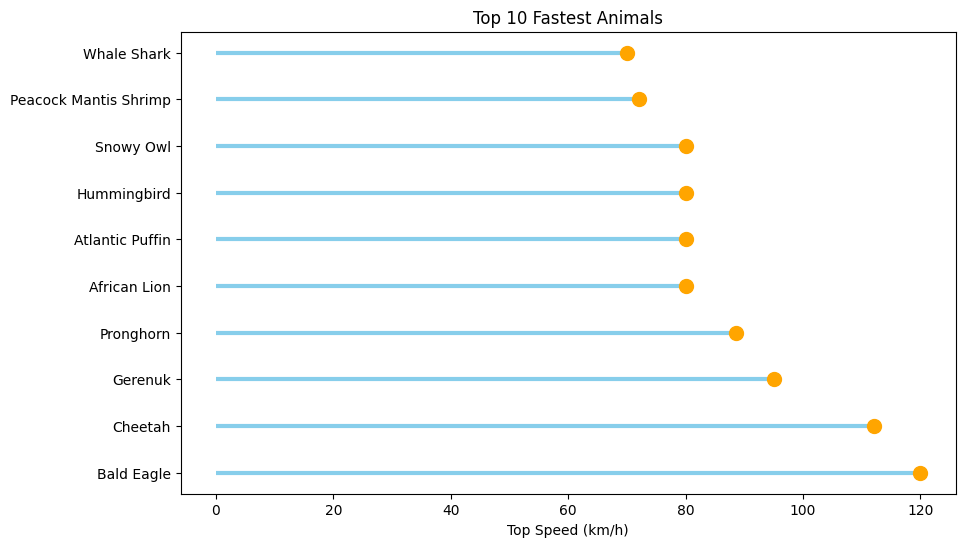

In [56]:
import matplotlib.pyplot as plt

df["TopSpeed_num"] = pd.to_numeric(df["Top Speed (km/h)"], errors="coerce")
df_clean = df.dropna(subset=["TopSpeed_num"])
top_speed = df_clean.nlargest(10, "TopSpeed_num")

plt.figure(figsize=(10,6))
plt.hlines(y=top_speed["Animal"], xmin=0, xmax=top_speed["TopSpeed_num"], color='skyblue', linewidth=3)
plt.plot(top_speed["TopSpeed_num"], top_speed["Animal"], "o", color="orange", markersize=10)
plt.xlabel("Top Speed (km/h)")
plt.title("Top 10 Fastest Animals")
plt.show()


Most common predator: Humans with 30 occurrences


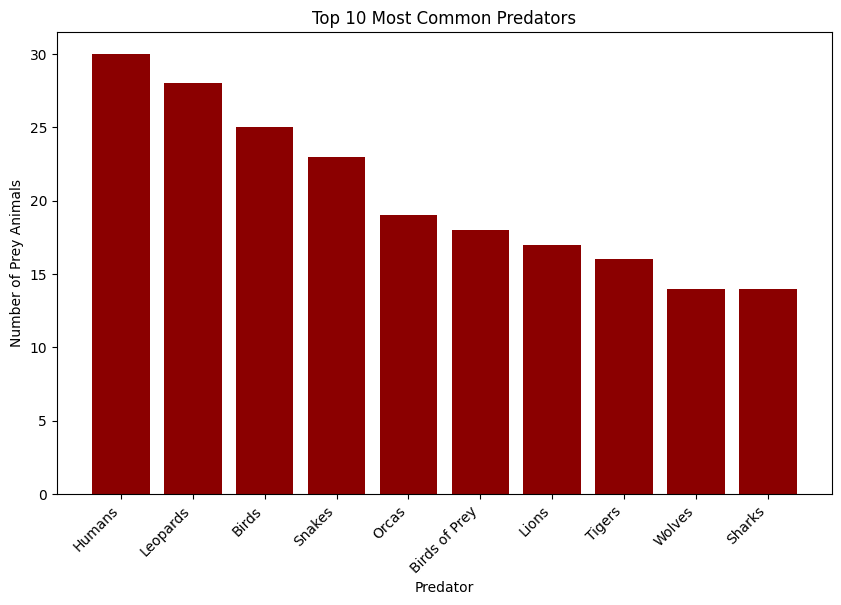

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

predators_list = df["Predators"].dropna().tolist()

all_predators = []
for predators in predators_list:
    for pred in predators.split(","):
        all_predators.append(pred.strip())

pred_count = Counter(all_predators)

most_common_predator = pred_count.most_common(1)[0]
print("Most common predator:", most_common_predator[0], "with", most_common_predator[1], "occurrences")

top10 = pred_count.most_common(10)
pred_names = [x[0] for x in top10]
pred_values = [x[1] for x in top10]

plt.figure(figsize=(10,6))
plt.bar(pred_names, pred_values, color="darkred")
plt.xlabel("Predator")
plt.ylabel("Number of Prey Animals")
plt.title("Top 10 Most Common Predators")
plt.xticks(rotation=45, ha="right")
plt.show()
